In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import sinter
from typing import List, Dict, Any
import sys
sys.path.append('../../')
from plot_utils import estimate_threshold, plot_stats, plot_stats_bias
%matplotlib inline

In [4]:
file = "CSSRotatedArchitecture3Swaps_p10_ThreshBias/results.csv"
stats = sinter.stats_from_csv_files(file) #(file_z_memory, file_x_memory)
etas = [0.5,1 ,10, 100, 1000, 10000]
logical_error_per_round = True

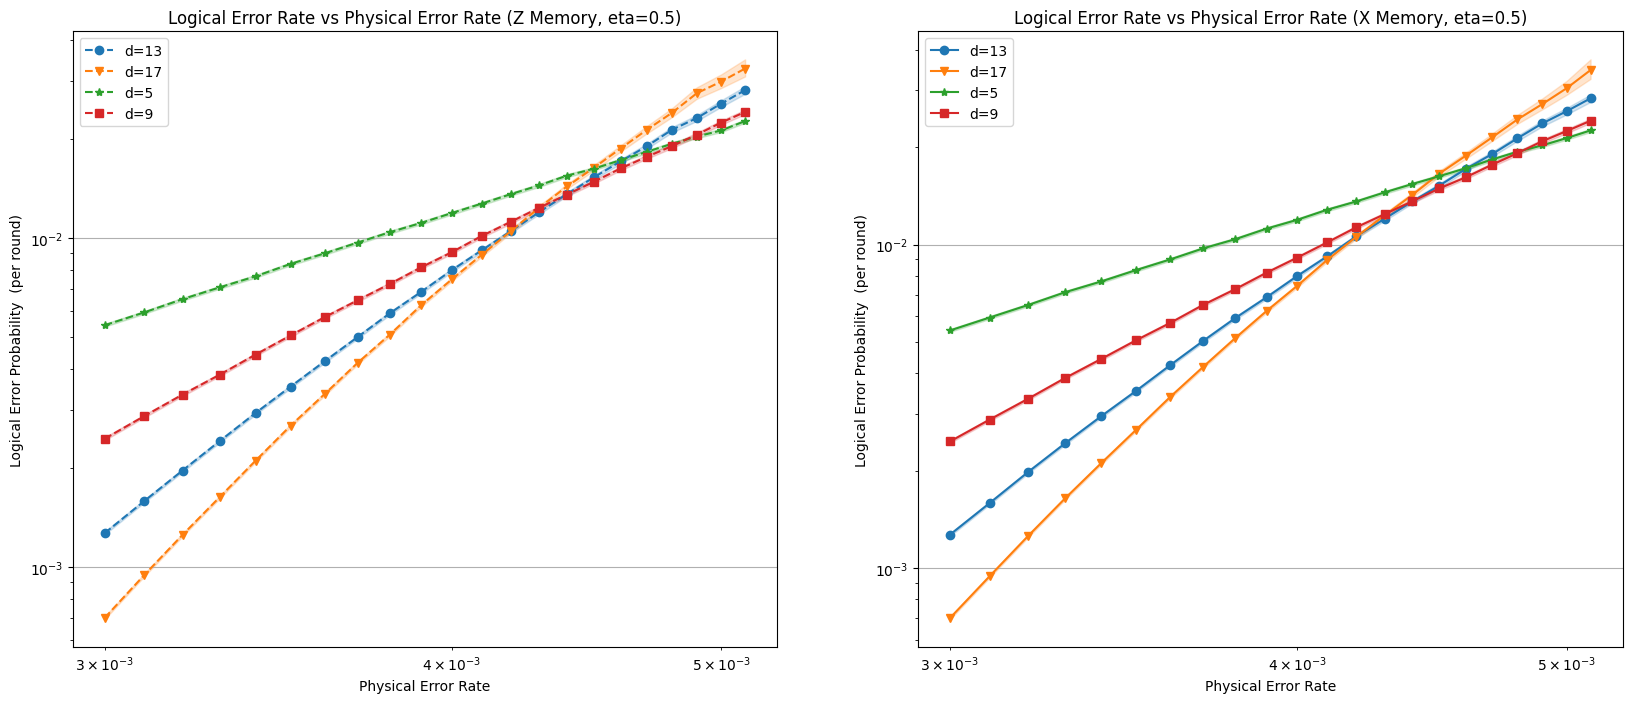

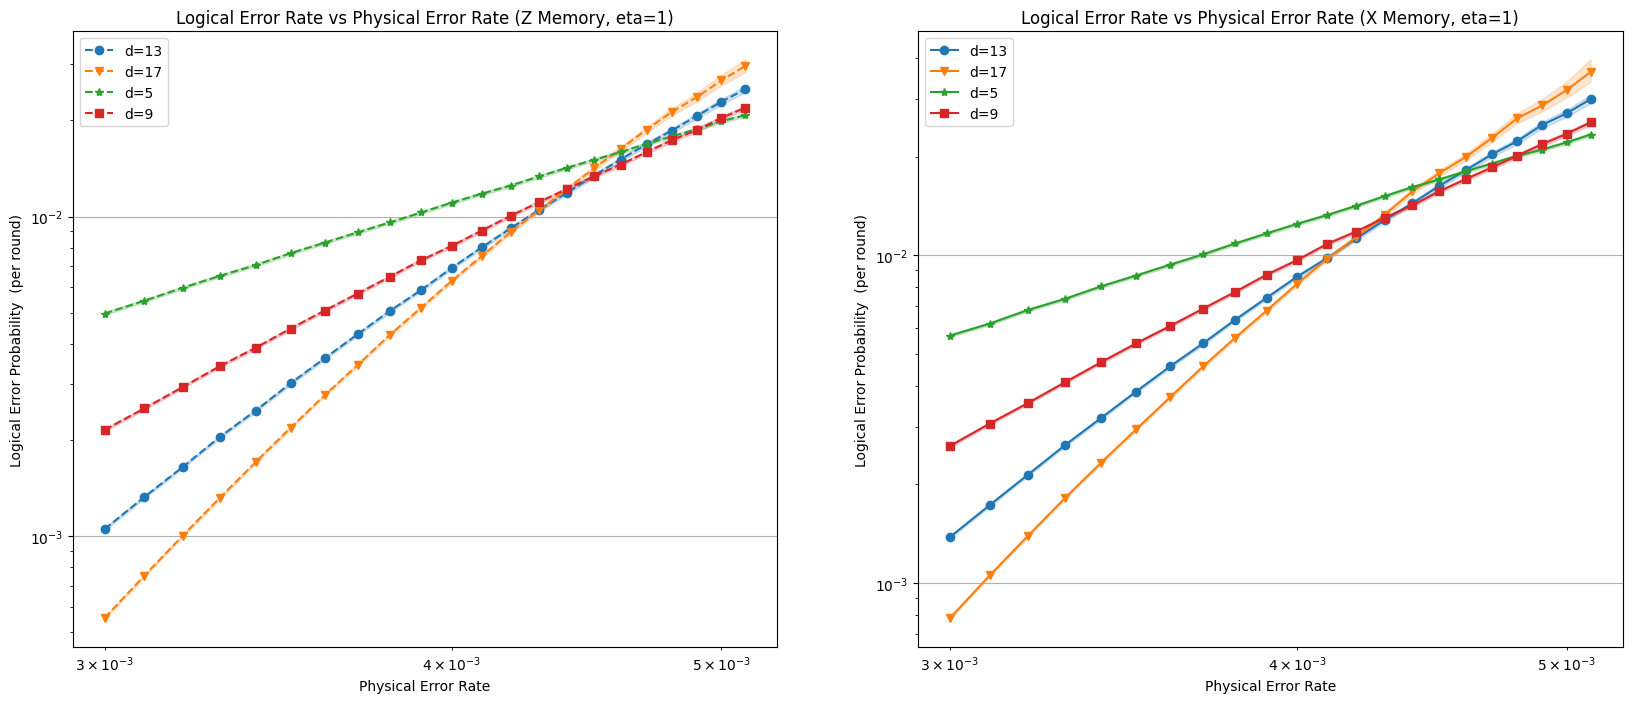

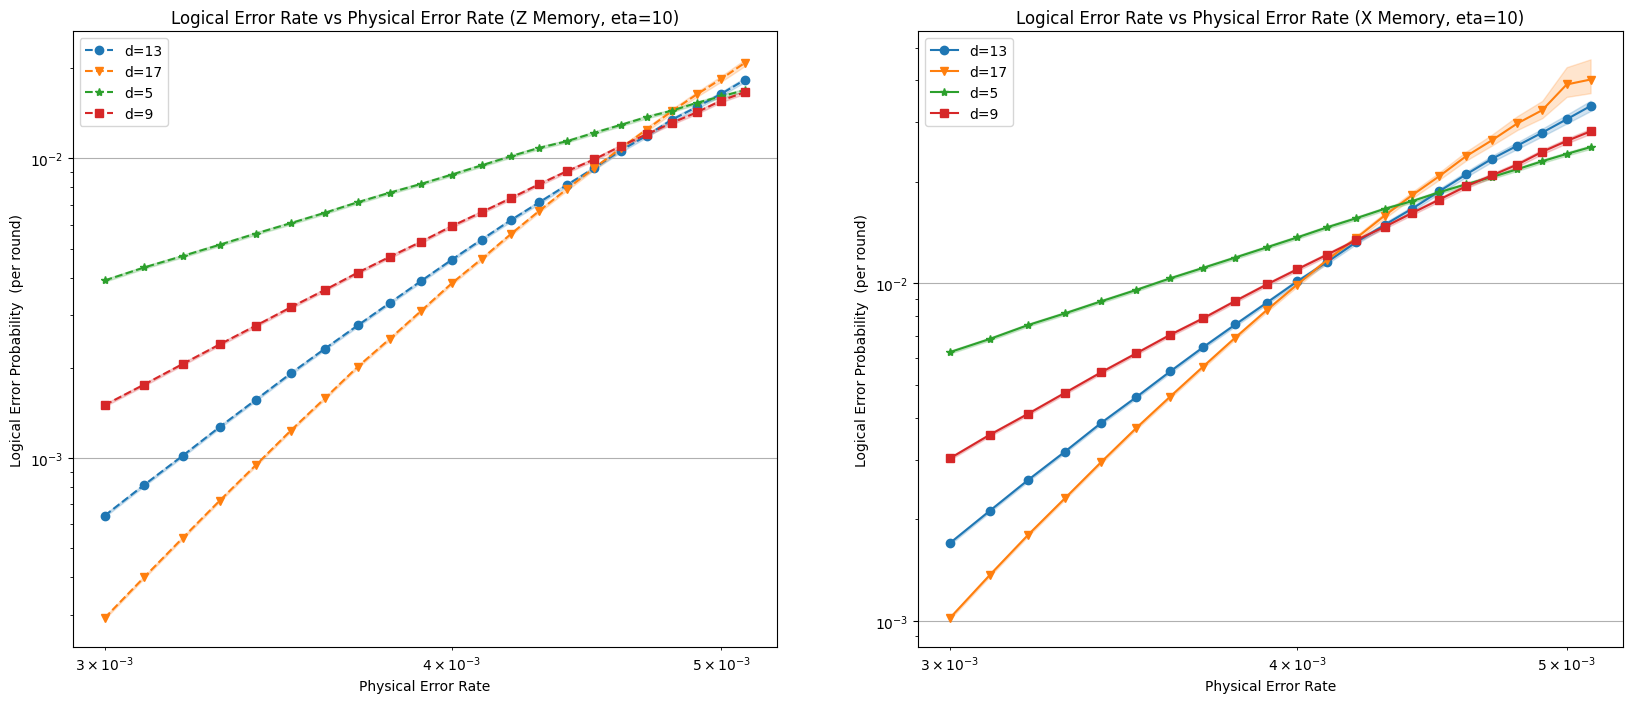

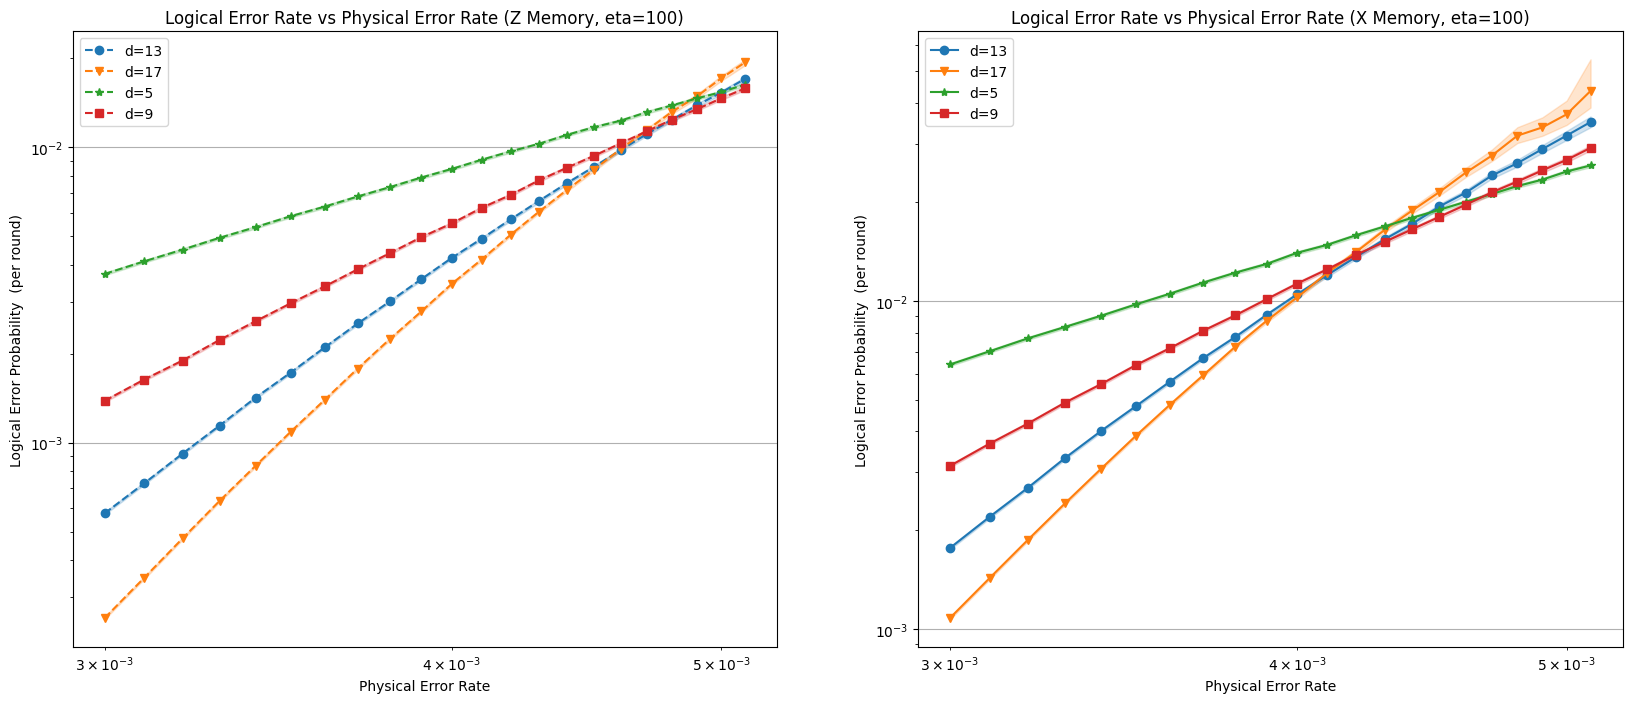

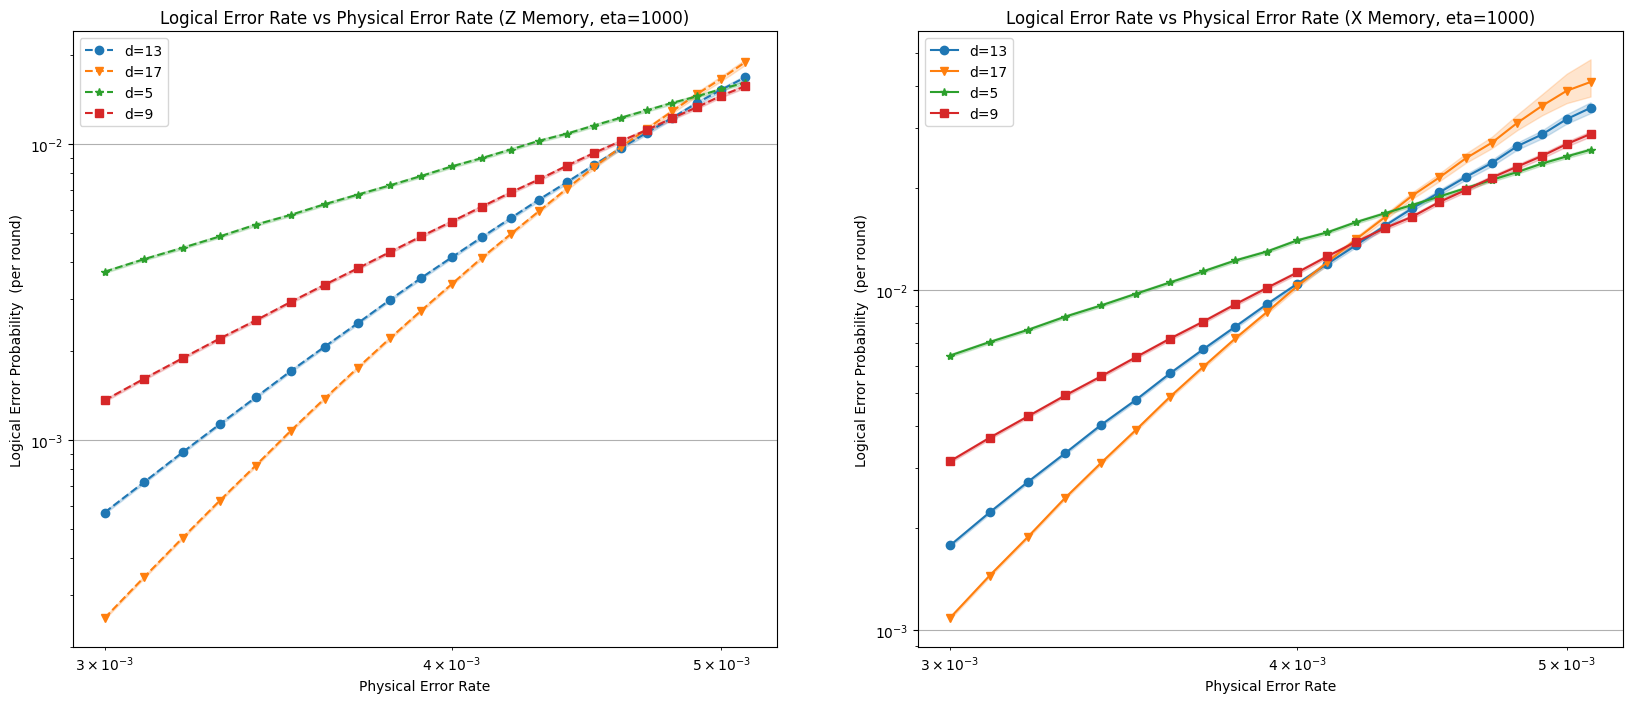

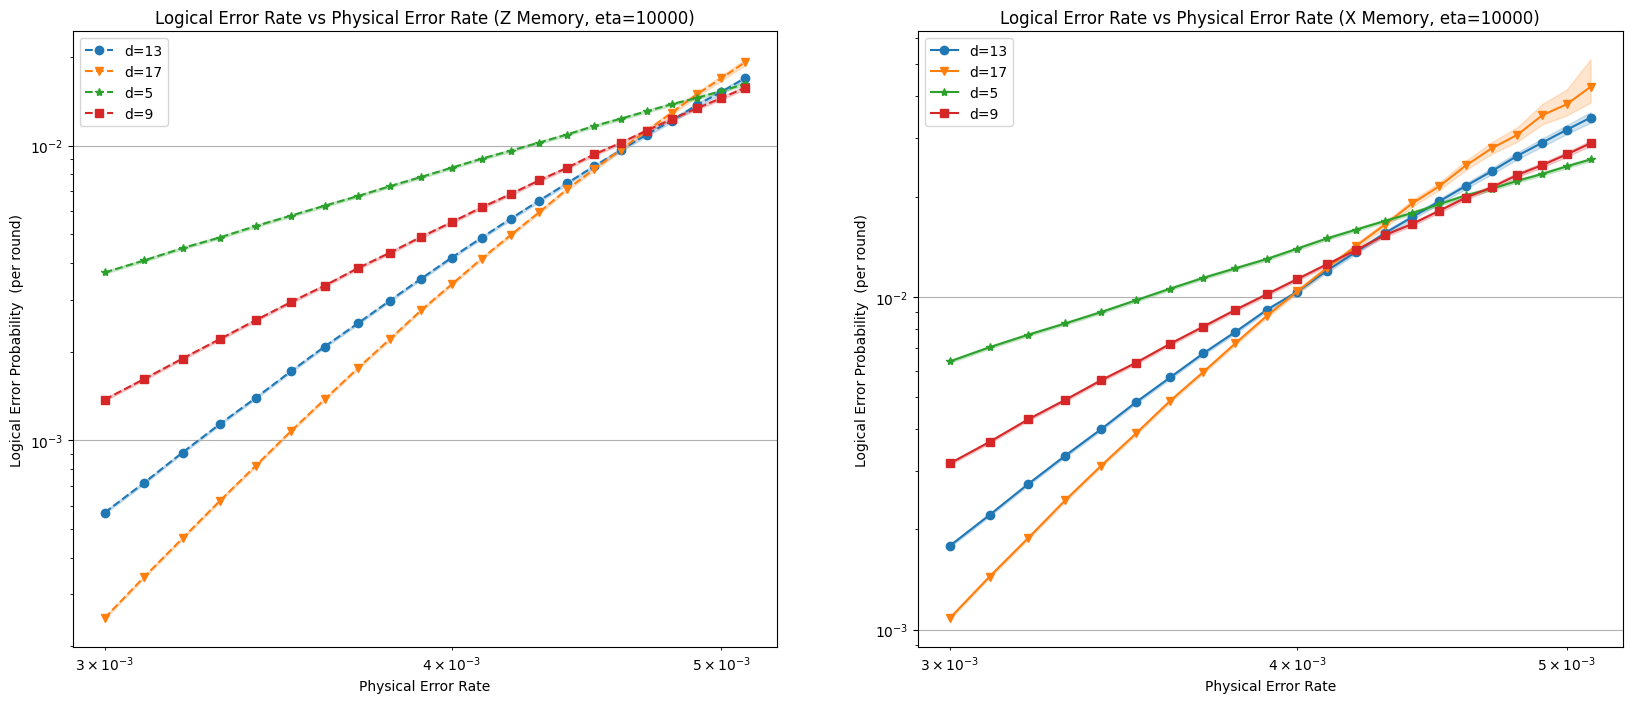

In [5]:
for eta in etas:
    stats_z = [stat for stat in stats if stat.json_metadata['memory'] == "Z" and stat.json_metadata["eta"] == eta]
    stats_x = [stat for stat in stats if stat.json_metadata['memory'] == "X" and stat.json_metadata["eta"] == eta]

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    plot_stats(stats_z, ax=ax[0], logical_error_per_round=logical_error_per_round)
    plot_stats(stats_x, ax=ax[1], logical_error_per_round=logical_error_per_round)

    ax[0].set_title(f'Logical Error Rate vs Physical Error Rate (Z Memory, eta={eta})')
    ax[1].set_title(f'Logical Error Rate vs Physical Error Rate (X Memory, eta={eta})')

## Estimate Thresholds

[(0.5, 0.0045, 0.0045), (1, 0.0046, 0.0045), (10, 0.0048, 0.0044), (100, 0.0049, 0.0043), (1000, 0.0049, 0.0043), (10000, 0.0049, 0.0043)]


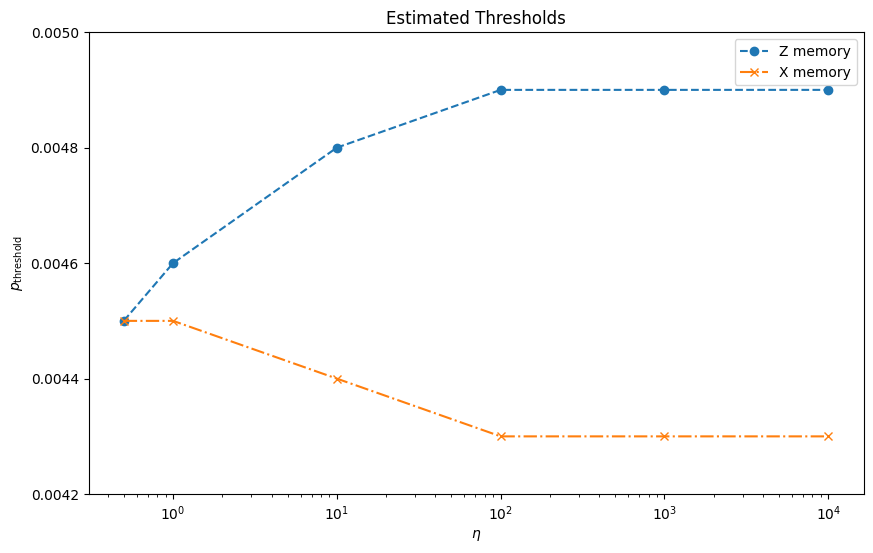

In [6]:
thresholds = []
for eta in etas:
    stats_z = [stat for stat in stats if stat.json_metadata['memory'] == "Z" and stat.json_metadata["eta"] == eta]
    stats_x = [stat for stat in stats if stat.json_metadata['memory'] == "X" and stat.json_metadata["eta"] == eta]
    thresholds.append((eta,
                       estimate_threshold(stats_z, logical_error_per_round=logical_error_per_round),
                       estimate_threshold(stats_x, logical_error_per_round=logical_error_per_round)))

print(thresholds)

# Plot the estimated thresholds
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
etas, z_thresholds, x_thresholds = zip(*thresholds)
ax.plot(etas, z_thresholds, 'o--', label='Z memory')
ax.plot(etas, x_thresholds, 'x-.', label='X memory')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title("Estimated Thresholds")
ax.set_xlabel(r"$\eta$")
ax.set_ylabel(r"$p_\mathrm{threshold}$")
ax.legend()
ax.set_ylim([0.0042, 0.005])
plt.rcParams.update({'font.size': 22})

plt.show()
